## Evaluation Metrics for classification Practice

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
os.system("wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv")

--2025-10-20 18:55:37--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

     0K .......... .......... .......... .......... .......... 63% 24.6M 0s
    50K .......... .......... ........                        100% 37.1M=0.003s

2025-10-20 18:55:37 (28.0 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



0

## Data Preparation
Download the data, read it with pandas
Look at the data
Make column names and values look uniform
Check if all the columns read correctly
Check if the churn variable needs any preparation.
"lead scoring dataset Bank Marketing dataset."

In [3]:
df = pd.read_csv("course_lead_scoring.csv")
df.head(3)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1


In [4]:
df.head().T

,0,1,2,3,4
lead_source,paid_ads,social_media,events,paid_ads,referral
industry,NaN,retail,healthcare,retail,education
number_of_courses_viewed,1,1,5,2,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0
employment_status,unemployed,employed,unemployed,NaN,self_employed
location,south_america,south_america,australia,australia,europe
interaction_count,4,1,3,1,3
lead_score,0.94,0.8,0.69,0.87,0.62
converted,1,0,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [6]:
df.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1281.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,59886.273224,2.976744,0.506108,0.619015
std,1.449717,15070.140389,1.681564,0.288465,0.485795
min,0.000000,13929.000000,0.000000,0.000000,0.000000
25%,1.000000,49698.000000,2.000000,0.262500,0.000000
50%,2.000000,60148.000000,3.000000,0.510000,1.000000
75%,3.000000,69639.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000


In [7]:
df.nunique()

lead_source                    5
industry                       7
number_of_courses_viewed      10
annual_income               1267
employment_status              4
location                       7
interaction_count             12
lead_score                   101
converted                      2
dtype: int64

In [8]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [9]:
column_list = list(df.columns)
column_list

['lead_source',
 'industry',
 'number_of_courses_viewed',
 'annual_income',
 'employment_status',
 'location',
 'interaction_count',
 'lead_score',
 'converted']

In [10]:
for c in column_list:
    if df[c].isna().sum() > 0 and df[c].dtypes == 'object':
        df[c] = df[c].fillna('NA')
    elif df[c].isna().sum() > 0 and df[c].dtypes != 'object':
        df[c] = df[c].fillna(0)
    else:
        pass

df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [11]:
df.head(10)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
5,events,manufacturing,1,59904.0,NA,africa,6,0.83,1
6,social_media,technology,0,51283.0,NA,middle_east,2,0.57,0
7,social_media,NA,5,62975.0,student,europe,4,0.62,1
8,referral,healthcare,4,38648.0,unemployed,south_america,2,0.86,1
9,paid_ads,other,3,59866.0,student,australia,3,0.43,1


## Setting up the validation framework
Perform the train/validation/test split with Scikit-Learn

In [12]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [13]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [14]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [17]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

In [18]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

ROC AUC feature importance

In [19]:
from sklearn.metrics import roc_auc_score

In [20]:
for n in numerical:
    score = roc_auc_score(y_train, df_train[n])
    print('AUC for %s is %s' % (n, score))


AUC for number_of_courses_viewed is 0.7635680590007088
AUC for annual_income is 0.5519578313253012
AUC for interaction_count is 0.738270176293409
AUC for lead_score is 0.6144993577250176


Training the model

In [21]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [22]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [28]:
dv, model = train(df_train, y_train)

In [29]:
y_pred = predict(df_val, dv, model)

In [32]:
auc = roc_auc_score(y_val, y_pred)
print('AUC on the validation set is %.2f' % (auc))

AUC on the validation set is 0.82


Precision and Recall

In [33]:
def pr_re_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
    df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    
    return df_scores

In [34]:
df_rand = pr_re_dataframe(y_val, y_pred)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall
0,0.0,171,122,0,0,1.000000,1.000000,0.583618,1.000000
10,0.1,171,122,0,0,1.000000,1.000000,0.583618,1.000000
20,0.2,171,122,0,0,1.000000,1.000000,0.583618,1.000000
30,0.3,171,119,0,3,1.000000,0.975410,0.589655,1.000000
40,0.4,171,105,0,17,1.000000,0.860656,0.619565,1.000000
50,0.5,164,81,7,41,0.959064,0.663934,0.669388,0.959064
60,0.6,150,53,21,69,0.877193,0.434426,0.738916,0.877193
70,0.7,106,25,65,97,0.619883,0.204918,0.809160,0.619883
80,0.8,64,6,107,116,0.374269,0.049180,0.914286,0.374269
90,0.9,24,1,147,121,0.140351,0.008197,0.960000,0.140351


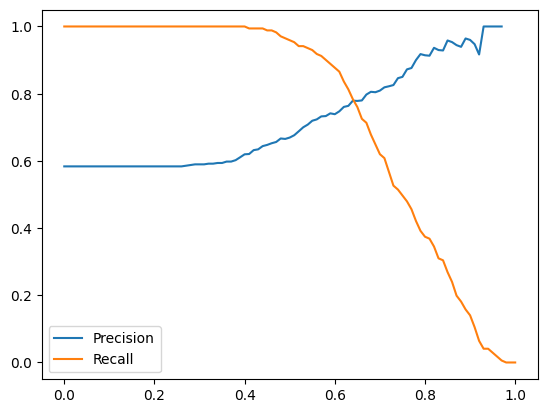

In [ ]:
plt.plot(df_rand.threshold, df_rand['precision'], label='Precision')
plt.plot(df_rand.threshold, df_rand['recall'], label='Recall')
plt.legend()

F1 score

In [36]:
def F1_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
    df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    
    df_scores['F1'] = 2 * ((df_scores.precision * df_scores.recall) / (df_scores.precision + df_scores.recall))

    
    return df_scores

In [38]:
df_rand = F1_dataframe(y_val, y_pred)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall,F1
0,0.0,171,122,0,0,1.000000,1.000000,0.583618,1.000000,0.737069
10,0.1,171,122,0,0,1.000000,1.000000,0.583618,1.000000,0.737069
20,0.2,171,122,0,0,1.000000,1.000000,0.583618,1.000000,0.737069
30,0.3,171,119,0,3,1.000000,0.975410,0.589655,1.000000,0.741866
40,0.4,171,105,0,17,1.000000,0.860656,0.619565,1.000000,0.765101
50,0.5,164,81,7,41,0.959064,0.663934,0.669388,0.959064,0.788462
60,0.6,150,53,21,69,0.877193,0.434426,0.738916,0.877193,0.802139
70,0.7,106,25,65,97,0.619883,0.204918,0.809160,0.619883,0.701987
80,0.8,64,6,107,116,0.374269,0.049180,0.914286,0.374269,0.531120
90,0.9,24,1,147,121,0.140351,0.008197,0.960000,0.140351,0.244898


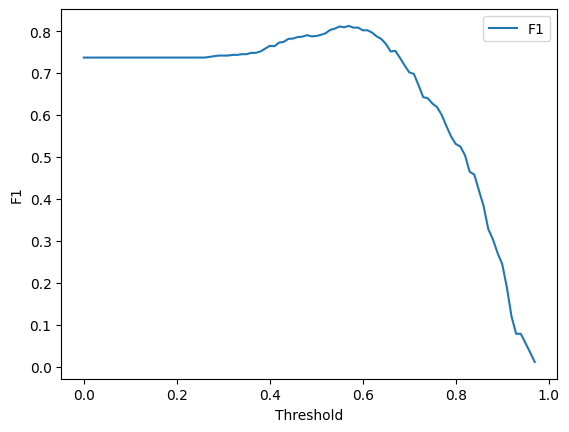

In [39]:
plt.plot(df_rand.threshold, df_rand['F1'], label='F1')
plt.xlabel('Threshold')
plt.ylabel('F1')
plt.legend()

In [42]:
df_rand['F1'].max()

np.float64(0.8124999999999999)

In [46]:
df_rand[df_rand['F1'] == 0.8124999999999999]

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall,F1
57,0.57,156,57,15,65,0.912281,0.467213,0.732394,0.912281,0.8125


5-Fold cv

In [47]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [53]:
def train(df_train, y_train, C):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [54]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [ ]:
n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted.values
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

    print('Mean is %.3f +- STD is %s' % (np.mean(scores), np.std(scores)))

Mean is 0.806 +- STD is 0.000
Mean is 0.839 +- STD is 0.033


Mean is 0.818 +- STD is 0.040
Mean is 0.814 +- STD is 0.035
Mean is 0.822 +- STD is 0.036


Hyperparameter Tuning

In [56]:
n_splits = 5

for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s Mean = %.3f +- STD = %.3f' % (C, np.mean(scores), np.std(scores)))

100%|██████████| 3/3 [00:00<00:00, 13.25it/s]

C=1e-06 Mean = 0.560 +- STD = 0.024
C=0.001 Mean = 0.867 +- STD = 0.029
C=1 Mean = 0.822 +- STD = 0.036
